## Work to be done 

● Delete all non-wind-related and time-related features from your dataset

● Extract a sub-dataset corresponding to exactly one year

● Plot the three wind-related features as a function of time spanning the
whole year

● Calculate the number of hours during which the wind was not blowing

● Plot the monthly-averaged wind-related features as a function of the
number of the month

● Plot the wind speed distribution at 10m and 100m above the ground

● Find the parameters of the Weibull distribution that seems to fit best your data


In [151]:
# Importation of required python packages 

import pandas as pd                     # store and manipulate dataframes
import numpy as np                      # store arrays and more
import matplotlib.pyplot as plt         # allows data visualisation 
from scipy.stats import weibull_min     # useful for estimating parameters of a weibull distribution

In [152]:
# First we import the dataset as a dataframe 
df = pd.read_csv('paris.csv')

In [153]:
# Fancy indexing starting from 1 instead of 0
df.index = range(1, 175345)

In [154]:
# Taking a look at the first rows of the dataframe 
df.head()

,air_temp,albedo,azimuth,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dewpoint_temp,dhi,...,snow_water_equivalent,snow_soiling_rooftop,snow_soiling_ground,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,zenith,period_end,period
1,6,0.14,-11,0,0,0,0,0.0,4.9,0,...,0.0,0,0,216,211,8.8,4.7,154,2014-01-01T00:30:00Z,PT30M
2,6,0.14,-26,0,0,0,0,0.0,4.8,0,...,0.0,0,0,216,210,8.7,4.5,152,2014-01-01T01:00:00Z,PT30M
3,6,0.14,-39,0,0,0,0,0.0,4.7,0,...,0.0,0,0,215,209,8.7,4.5,150,2014-01-01T01:30:00Z,PT30M
4,6,0.14,-50,0,0,0,0,0.0,4.6,0,...,0.0,0,0,213,207,8.8,4.6,146,2014-01-01T02:00:00Z,PT30M
5,6,0.14,-60,0,0,0,0,0.0,4.6,0,...,0.0,0,0,211,206,8.8,4.7,142,2014-01-01T02:30:00Z,PT30M


In [164]:
# We select only the wind-related and time-related features

wind_features = ['wind_direction_100m', 'wind_direction_10m', 'wind_speed_100m', 'wind_speed_10m']
time_feature = ['period_end']
selected_features = wind_features + time_feature
df = df[selected_features]

In [165]:
# We convert the column period_end data-type to datetime to make the following tasks easier 
df['period_end'] = pd.to_datetime(df['period_end'])

# We extract from the column the year of interest 
df['year'] = df['period_end'].dt.year
year = 2023

# We then update the dataframe 
df = df[df['year'] == year]

In [166]:
df.head()

,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,period_end,year
157776,217,214,12.9,7.7,2023-01-01 00:00:00+00:00,2023
157777,218,215,12.6,7.5,2023-01-01 00:30:00+00:00,2023
157778,218,216,12.3,7.4,2023-01-01 01:00:00+00:00,2023
157779,219,216,11.9,7.1,2023-01-01 01:30:00+00:00,2023
157780,219,217,11.5,6.7,2023-01-01 02:00:00+00:00,2023


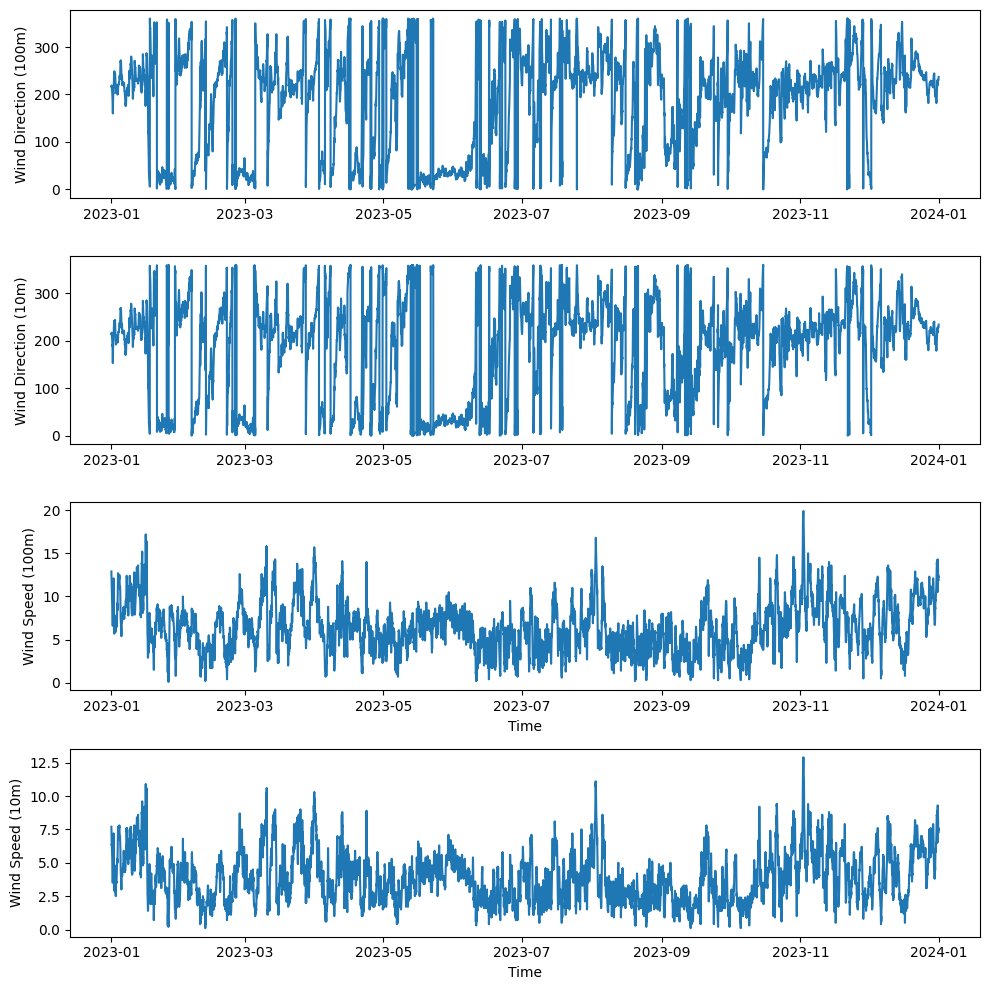

In [167]:
# We now plot the wind-related features as a function of time

fig, axs = plt.subplots(4, 1, figsize=(10, 10))
axs[0].plot(df['period_end'], df['wind_direction_100m'])
axs[0].set_ylabel('Wind Direction (100m)')
axs[1].plot(df['period_end'], df['wind_direction_10m'])
axs[1].set_ylabel('Wind Direction (10m)')

axs[2].plot(df['period_end'], df['wind_speed_100m'])
axs[2].set_ylabel('Wind Speed (100m)')
axs[2].set_xlabel('Time')

axs[3].plot(df['period_end'], df['wind_speed_10m'])
axs[3].set_ylabel('Wind Speed (10m)')
axs[3].set_xlabel('Time')

plt.tight_layout()
plt.show()

In [169]:
'''Here we first calculate the number of hours during which the wind was not blowing at 100m of altitude'''

# We set the wind speed threshold (in m/s) by making the assumption that wind is not blowing below this velocity
wind_threshold = 0.5

# Now we calculate the number of hours during which the wind was not blowing
no_wind_hours = ((df['wind_speed_100m'] < wind_threshold) & (df['wind_speed_100m'].notna())).sum()

# Same for the total number of hours in the dataset
total_hours = len(df)

# We compute the percentage of time with no wind
no_wind_percentage = (no_wind_hours / total_hours) * 100

# Print the results
print(f"Number of hours with no wind at 100m in atittude : {no_wind_hours}")
print(f"Total hours in the dataset: {total_hours}")
print(f"Percentage of time with no wind: {round(no_wind_percentage, 2)}%")
print(f"Percentage of time with blowing wind : {100 - (round(no_wind_percentage, 2))}%")

Number of hours with no wind at 100m in atittude : 30
Total hours in the dataset: 17520
Percentage of time with no wind: 0.17%
Percentage of time with blowing wind : 99.83%


In [170]:
'''We now do the same but for 10m above sea-level'''

# Set the wind speed threshold (in m/s)
wind_threshold = 0.5

# Calculate the number of hours during which the wind was not blowing
no_wind_hours = ((df['wind_speed_10m'] < wind_threshold) & (df['wind_speed_10m'].notna())).sum()

# Calculate the total number of hours in the dataset
total_hours = len(df)

# Calculate the percentage of time with no wind
no_wind_percentage = (no_wind_hours / total_hours) * 100

# Print the results
print(f"Number of hours with no wind at 10m in attitude : {no_wind_hours}")
print(f"Total hours in the dataset: {total_hours}")
print(f"Percentage of time with no wind: {round(no_wind_percentage, 2)}%")
print(f"Percentage of time with blowing wind : {100 - (round(no_wind_percentage, 2))}%")


Number of hours with no wind at 10m in attitude : 45
Total hours in the dataset: 17520
Percentage of time with no wind: 0.26%
Percentage of time with blowing wind : 99.74%


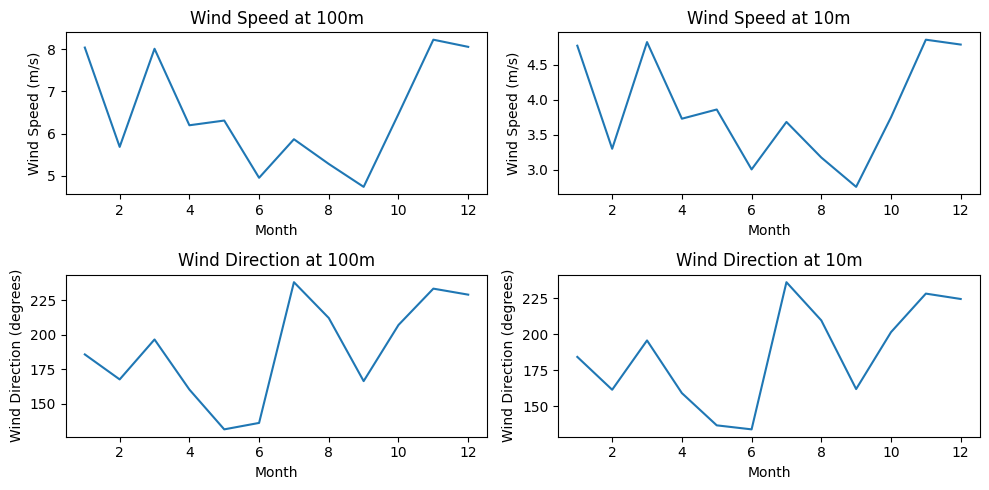

In [171]:
'''We now plot of the monthly-averaged wind-related features as a function of the number of the month'''

# We first extract the wind-related features
wind_speed_100m = df['wind_speed_100m']
wind_speed_10m = df['wind_speed_10m']
wind_direction_100m = df['wind_direction_100m']
wind_direction_10m = df['wind_direction_10m']

# Now we extract the month from the period column
df['month'] = pd.DatetimeIndex(df['period_end']).month

# Then we calculate the monthly average of the wind-related features
wind_speed_100m_monthly = wind_speed_100m.groupby(df['month']).mean().reset_index()
wind_speed_10m_monthly = wind_speed_10m.groupby(df['month']).mean().reset_index()
wind_direction_100m_monthly = wind_direction_100m.groupby(df['month']).mean().reset_index()
wind_direction_10m_monthly = wind_direction_10m.groupby(df['month']).mean().reset_index()

# Lastly we plot the monthly-averaged wind-related features
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.plot(wind_speed_100m_monthly['month'], wind_speed_100m_monthly['wind_speed_100m'])
plt.title('Wind Speed at 100m')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')

plt.subplot(2, 2, 2)
plt.plot(wind_speed_10m_monthly['month'], wind_speed_10m_monthly['wind_speed_10m'])
plt.title('Wind Speed at 10m')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')

plt.subplot(2, 2, 3)
plt.plot(wind_direction_100m_monthly['month'], wind_direction_100m_monthly['wind_direction_100m'])
plt.title('Wind Direction at 100m')
plt.xlabel('Month')
plt.ylabel('Wind Direction (degrees)')

plt.subplot(2, 2, 4)
plt.plot(wind_direction_10m_monthly['month'], wind_direction_10m_monthly['wind_direction_10m'])
plt.title('Wind Direction at 10m')
plt.xlabel('Month')
plt.ylabel('Wind Direction (degrees)')

plt.tight_layout()
plt.show()

Shape parameter: 2.39
Scale parameter: 7.33


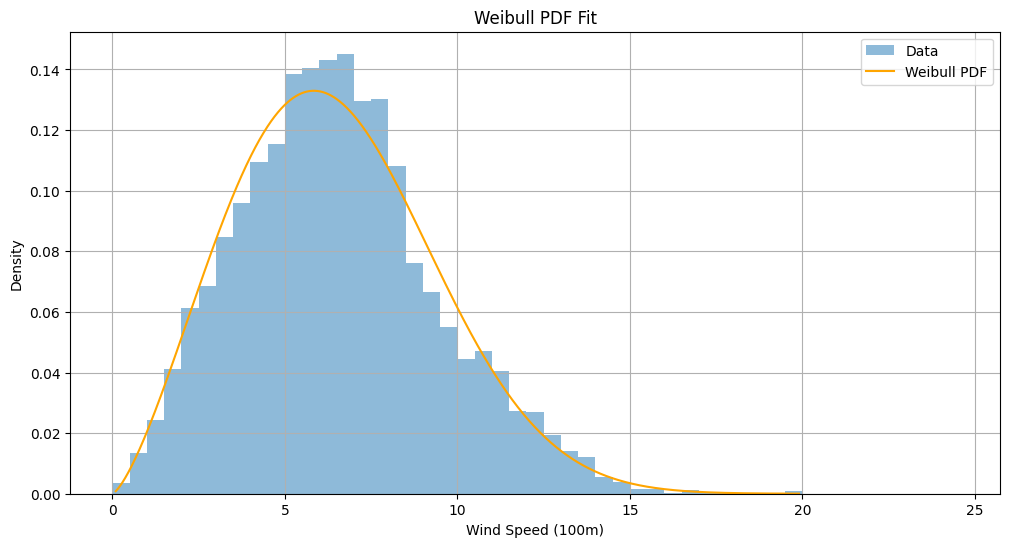

In [177]:
# We select the appropriate data and drop empty cells if there are some to not disturb results 
data = df['wind_speed_100m'].dropna()

# We fit the Weibull distribution to the data
params = weibull_min.fit(data, floc=0)

# Print the estimated parameters
print('Shape parameter:', round(params[0], 2))
print('Scale parameter:', round(params[2], 2))

# We generate the Weibull distribution with the estimated parameters
weibull_dist = weibull_min(params[0], loc=params[1], scale=params[2])

# We generate an array of values over the range of your data
x_values = np.linspace(min(data), max(data), 1000)

# We generate the PDF of the Weibull distribution for the x_values
pdf = weibull_dist.pdf(x_values)

# Plot the histogram of the data
plt.figure(figsize=(12, 6))
plt.hist(data, bins=np.arange(0, 25, 0.5), density=True, alpha=0.5, label='Data')

# Plot the PDF of the Weibull distribution
plt.plot(x_values, pdf, label='Weibull PDF', color='orange')

# Add a legend and show the plot for PDF
plt.legend()
plt.title('Weibull PDF Fit')
plt.xlabel('Wind Speed (100m)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


## Finally, answer to the following question: What is the effect of the wind direction, and how should you take that into account when installing your wind turbine ? 